In [17]:
users_df.head(1)

,nbr_ratings,user_id,user_name,joined,location
0,1890,175852,Manslow,1.337508e+09,Poland


# **BeerAdvocate Datasets (*Attributes Description*)**

Below are descriptions of each attribute contained in the RateBeer datasets. These datasets include details about various beers, their breweries and locations, ratings, reviews, users, location of users etc.


## `beers.csv`

- `beer_id`: The unique identifier for each beer.
- `beer_name`: The name of the beer, which is also used in the reviews.
- `brewery_id`: The unique identifier of the brewery (also used in the reviews).
- `brewery_name` : The name of the brewery that 
- `style`: a score that ranks this beer against all beers within its own style category.
- `nbr_ratings` : The number of ratings a beer received.
- `avg`: The average rating of a beer from 0 to 5.
- `abv`: The alcohol content of the beer (percentage).
- `overall_score`: a score that reflects the rating given by RateBeer users and how this beer compares to all other beers on RateBeer. (out of 100)
- `style_score` : a score that ranks this beer against all beers within its own style category.

> These two scores are calculated only from ratings that are accompanied with a written review of 75 or more characters. A rating doesn't count toward the final rating if the rater has left fewer than 10 ratings, if it is is deemed unauthentic, derogatory or abusive or if the rating was made by a brewer or brewer affiliate. Reference [here](https://www.ratebeer.com/our-scores)


---

## `breweries.csv`

- `id` : the brewery's id which corresponds to the id *brewery_id* from `beer.csv`
- `location` : the location of the brewery
- `name` : the name of the brewery
- `nbr_beers` : the number of beers that brewery produces

---

## `users.csv`

- `user_id` : the user_id 
- `nbr_ratings` : the number of ratings the reviewer has put on the website
- `user_name` : the username
- `joined` : the date when the user joined the websites
- `location` : the user's location

--- 

## `reviews.csv`

- `beer_name` and `beer_id`: The name and unique identifier of the beer which corresponds to the ones in `beer.csv`
- `brewery_name` and `brewery_id`: The name and identifier of the brewery which corresponds to ones in `brewery.csv`.
- `style`: The type of beer, categorized into one of the beer styles (104 styles)
- `abv`: The alcohol by volume percentage of the beer (%).
- `date`: When the review was posted.
- `user_name` and `user_id`: The username and identifier of the reviewer, matching the `user.csv`.
- `text`: The written review provided by the user.

### Rating System

RateBeer employ a detailed rating system where users evaluate several aspects of the beer. The rating is composed of the following attributes:

- `appearance`
- `aroma`
- `palate`
- `taste`
- `overall`

On RateBeer, *Appearance* and *Mouthfeel* are each scored out of 5. *Aroma* and *Taste* are scored out of 10. While *Overall* is scored out of 20. These all combine to give the beer a total score out of 50, which is then divided and displayed as a score out of 5 for each rating. Reference [here](https://www.ratebeer.com/our-scores).

# Preliminary Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

In [3]:
# Set the default grid settings
plt.rcParams["axes.grid"] = False
plt.rcParams["font.family"] = "Helvetica"

In [7]:
# Read the CSV file
beer_df = pd.read_csv('../data/RateBeer/beers.csv')
breweries_df = pd.read_csv('../data/RateBeer/breweries.csv')
users_df = pd.read_csv('../data/RateBeer/users.csv')
reviews_df = pd.read_csv('../data/RateBeer/reviews.csv.gz', compression='gzip')


In [8]:
# function to calculate % of missing values in each column
def missing_values(df):
    value = df.isnull().sum()/len(df)*100
    return value

### `beer_df`

In [9]:
# Display the first 5 rows of the data
beer_df.head(5)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,NaN,NaN,2.72,5.0,2.000000,NaN,0,NaN
1,105273,Castel Beer (Gabon),3198,Sobraga,Pale Lager,10,5.0,58.0,2.18,5.2,1.910000,NaN,0,NaN
2,19445,Régab,3198,Sobraga,Pale Lager,27,1.0,22.0,1.83,4.5,1.811111,NaN,0,NaN
3,155699,Ards Bally Black Stout,13538,Ards Brewing Co.,Stout,6,NaN,NaN,3.18,4.6,3.866667,0.823699,6,3.866667
4,239097,Ards Belfast 366,13538,Ards Brewing Co.,Golden Ale/Blond Ale,1,NaN,NaN,2.79,4.2,3.000000,NaN,0,NaN


In [7]:
# dtype and memory usage
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442081 entries, 0 to 442080
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   beer_id                    442081 non-null  int64  
 1   beer_name                  442081 non-null  object 
 2   brewery_id                 442081 non-null  int64  
 3   brewery_name               442081 non-null  object 
 4   style                      442081 non-null  object 
 5   nbr_ratings                442081 non-null  int64  
 6   overall_score              104028 non-null  float64
 7   style_score                104068 non-null  float64
 8   avg                        395657 non-null  float64
 9   abv                        399987 non-null  float64
 10  avg_computed               396690 non-null  float64
 11  zscore                     42228 non-null   float64
 12  nbr_matched_valid_ratings  442081 non-null  int64  
 13  avg_matched_valid_ratings  42

In [8]:
# Descriptive statistics
beer_df.describe()

,beer_id,brewery_id,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
count,442081.000000,442081.000000,442081.000000,104028.000000,104068.000000,395657.000000,399987.000000,396690.000000,42228.000000,442081.000000,42228.000000
mean,277156.237803,12336.287223,16.110337,55.680817,54.986124,3.026580,6.065485,3.244649,-0.104638,2.308624,3.372042
std,155079.685921,8693.672998,80.988812,28.482652,28.655427,0.304503,1.922965,0.507520,0.732841,26.621223,0.417038
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.500000,-5.460346,0.000000,0.500000
25%,144744.000000,3849.000000,1.000000,34.000000,33.000000,2.870000,4.800000,3.000000,-0.479561,0.000000,3.155129
50%,282812.000000,12457.000000,3.000000,53.000000,51.000000,3.020000,5.600000,3.300000,-0.023696,0.000000,3.409808
75%,411341.000000,18872.000000,9.000000,83.000000,82.000000,3.180000,7.000000,3.594088,0.364636,0.000000,3.650000
max,536489.000000,32246.000000,5272.000000,100.000000,100.000000,4.520000,100.000000,5.000000,2.941123,5270.000000,5.000000


In [9]:
missing_values(beer_df)

beer_id                       0.000000
beer_name                     0.000000
brewery_id                    0.000000
brewery_name                  0.000000
style                         0.000000
nbr_ratings                   0.000000
overall_score                76.468566
style_score                  76.459518
avg                          10.501243
abv                           9.521784
avg_computed                 10.267575
zscore                       90.447904
nbr_matched_valid_ratings     0.000000
avg_matched_valid_ratings    90.447904
dtype: float64

### `breweries_df`

In [10]:
breweries_df.head(5)

,id,location,name,nbr_beers
0,3198,Gabon,Sobraga,3
1,13538,Northern Ireland,Ards Brewing Co.,13
2,22304,Northern Ireland,Barrahooley Craft Brewery,4
3,22818,Northern Ireland,Boundary,66
4,24297,Northern Ireland,Brewbot Belfast,3


In [11]:
breweries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24189 entries, 0 to 24188
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         24189 non-null  int64 
 1   location   24189 non-null  object
 2   name       24189 non-null  object
 3   nbr_beers  24189 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 756.0+ KB


In [12]:
breweries_df.describe()

,id,nbr_beers
count,24189.000000,24189.000000
mean,16639.680061,19.022655
std,9408.751678,31.542620
min,1.000000,0.000000
25%,8746.000000,3.000000
50%,17119.000000,8.000000
75%,24763.000000,20.000000
max,32246.000000,295.000000


In [13]:
missing_values(breweries_df)

id           0.0
location     0.0
name         0.0
nbr_beers    0.0
dtype: float64

### `users_df`

In [14]:
users_df.head(5)

,nbr_ratings,user_id,user_name,joined,location
0,1890,175852,Manslow,1.337508e+09,Poland
1,89,442761,MAGICuenca91,1.484046e+09,Spain
2,169,288889,Sibarh,1.384600e+09,Poland
3,3371,250510,fombe89,1.363950e+09,Spain
4,13043,122778,kevnic2008,1.296644e+09,Germany


In [15]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70174 entries, 0 to 70173
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nbr_ratings  70174 non-null  int64  
 1   user_id      70174 non-null  int64  
 2   user_name    70174 non-null  object 
 3   joined       70144 non-null  float64
 4   location     50592 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.7+ MB


In [16]:
users_df.describe()

,nbr_ratings,user_id,joined
count,70174.000000,70174.000000,7.014400e+04
mean,108.820945,203689.319677,1.306632e+09
std,754.493211,143280.059822,1.300952e+08
min,1.000000,2.000000,9.555336e+08
25%,1.000000,70540.500000,1.204110e+09
50%,2.000000,193917.000000,1.340446e+09
75%,10.000000,327064.000000,1.405850e+09
max,46749.000000,489914.000000,1.501409e+09


In [18]:
missing_values(users_df)

nbr_ratings     0.000000
user_id         0.000000
user_name       0.000000
joined          0.042751
location       27.904922
dtype: float64

### `reviews_df`

In [19]:
reviews_df.head(5)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,33 Export (Gabon),410549,Sobraga,3198,Pale Lager,5.0,2016-04-26 09:59:28,Manslow,175852,2,4,2,4,8,2.0,"Puszka 0,33l dzięki Christoph . Kolor jasnozło..."
1,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2017-02-17 10:59:12,MAGICuenca91,442761,2,3,2,4,8,1.9,Cerveza pale lager gabonesa. MÃ¡s floja que la...
2,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2016-06-24 09:59:28,Sibarh,288889,3,3,2,3,5,1.6,"Kolor- złoty, klarowny. Piana - drobna, średni..."
3,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2016-01-01 10:59:12,fombe89,250510,4,3,1,2,5,1.5,"Botella, de GabÃ³n regalo familiar.31/01/2015C..."
4,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2015-10-23 09:59:28,kevnic2008,122778,2,4,2,4,7,1.9,Many thanks for this beer to Erzengel. Pours l...


In [20]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7122074 entries, 0 to 7122073
Data columns (total 16 columns):
 #   Column        Dtype  
---  ------        -----  
 0   beer_name     object 
 1   beer_id       int64  
 2   brewery_name  object 
 3   brewery_id    int64  
 4   style         object 
 5   abv           float64
 6   date          object 
 7   user_name     object 
 8   user_id       int64  
 9   appearance    int64  
 10  aroma         int64  
 11  palate        int64  
 12  taste         int64  
 13  overall       int64  
 14  rating        float64
 15  text          object 
dtypes: float64(2), int64(8), object(6)
memory usage: 869.4+ MB


In [21]:
reviews_df.describe()

,beer_id,brewery_id,abv,user_id,appearance,aroma,palate,taste,overall,rating
count,7.122074e+06,7.122074e+06,6.947090e+06,7.122074e+06,7.122074e+06,7.122074e+06,7.122074e+06,7.122074e+06,7.122074e+06,7.122074e+06
mean,1.380939e+05,6.146437e+03,6.503569e+00,1.012120e+05,3.440407e+00,6.418375e+00,3.284702e+00,6.496641e+00,1.321530e+01,3.285543e+00
std,1.374799e+05,6.991673e+03,2.158560e+00,1.050581e+05,7.737700e-01,1.538632e+00,7.967887e-01,1.538095e+00,3.152041e+00,6.864740e-01
min,1.000000e+00,1.000000e+00,1.000000e-02,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e-01
25%,1.568600e+04,5.400000e+02,5.000000e+00,2.003600e+04,3.000000e+00,6.000000e+00,3.000000e+00,6.000000e+00,1.200000e+01,3.000000e+00
50%,9.524300e+04,2.776000e+03,6.000000e+00,6.780900e+04,3.000000e+00,7.000000e+00,3.000000e+00,7.000000e+00,1.400000e+01,3.400000e+00
75%,2.213960e+05,1.115600e+04,7.700000e+00,1.348400e+05,4.000000e+00,7.000000e+00,4.000000e+00,7.000000e+00,1.500000e+01,3.700000e+00
max,5.364890e+05,3.224600e+04,7.300000e+01,4.899140e+05,5.000000e+00,1.000000e+01,5.000000e+00,1.000000e+01,2.000000e+01,5.000000e+00


In [22]:
missing_values(reviews_df)

beer_name       0.000000
beer_id         0.000000
brewery_name    0.000000
brewery_id      0.000000
style           0.000000
abv             2.456925
date            0.000000
user_name       0.000000
user_id         0.000000
appearance      0.000000
aroma           0.000000
palate          0.000000
taste           0.000000
overall         0.000000
rating          0.000000
text            0.000000
dtype: float64

### Locations Of Users Reviewing The Beers

In [23]:
# Add a column where all Users from the united states get 'United States' as location
users_df['location'] = users_df['location'].fillna('Unknown')
users_df['merged_location'] = users_df['location'].copy()
users_df.loc[(users_df['merged_location'].str.startswith('United States')), 'merged_location'] = 'United States'

In [24]:
breweries_df.rename(columns = {'name':'brewery_name'}, inplace = True)
breweries_df['merged_location'] = breweries_df['location'].copy()
breweries_df.loc[(breweries_df['merged_location'].str.startswith('United States')), 'merged_location'] = 'United States'

In [25]:

users_reviews_df = (reviews_df.merge(users_df[['merged_location', 'user_name']], on=['user_name'], how='left')).rename(columns={'merged_location':'user_location'})
users_breweries_reviews_df = (users_reviews_df.merge(breweries_df[['location', 'brewery_name']], on=['brewery_name'], how='left')).rename(columns = {'location':'brewery_location'})


In [26]:
locations_df = users_breweries_reviews_df.groupby(['user_location']).aggregate({'user_id':'count'}).sort_values(by='user_id', ascending=False).reset_index()
locations_df.head(50)

,user_location,user_id
0,United States,3107910
1,Denmark,582152
2,Canada,523480
3,England,441134
4,Sweden,283501
5,Netherlands,233778
6,Germany,218823
7,Norway,216949
8,Unknown,203745
9,Finland,191938


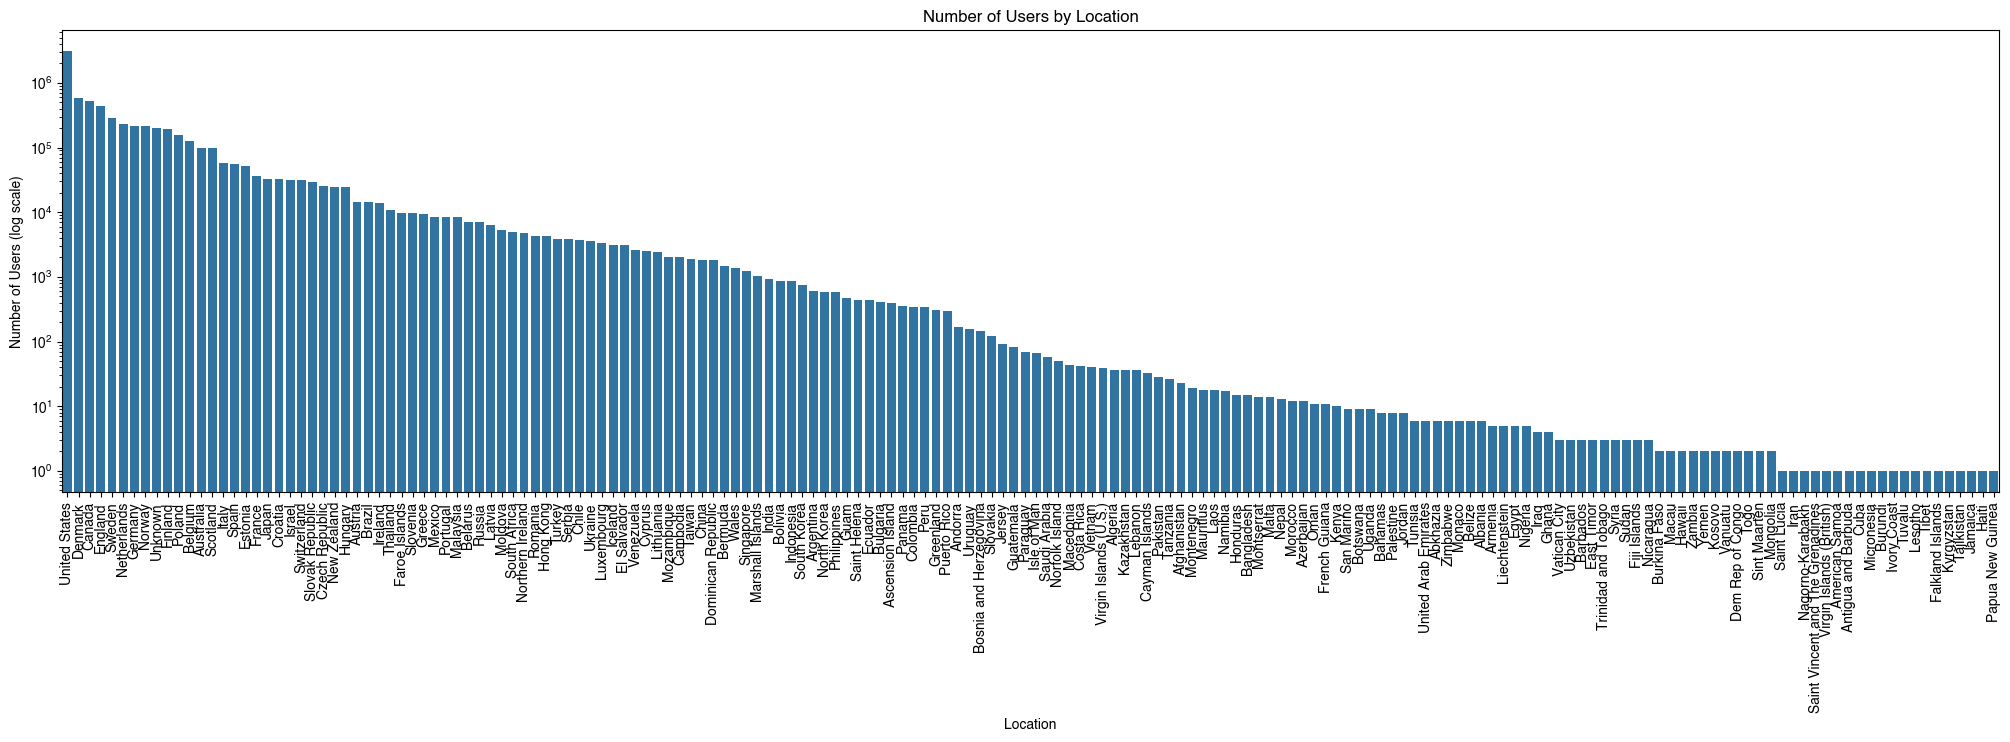

In [27]:
plt.figure(figsize=(25,6))
sns.barplot(x='user_location', y='user_id', data=locations_df, color='#1f77b4')
plt.xlabel('Location')
plt.ylabel('Number of Users (log scale)')
plt.yscale('log')
plt.title('Number of Users by Location')
plt.xticks(rotation=90)
plt.show()
